# Iris GP

## Main program

In [1]:
import random
import operator
import csv
import itertools

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import altergp as gp

# Read the iris list features and put it in a list of lists.
with open("iris.csv") as irisbase:
    irisReader = csv.reader(irisbase)
    irisDB = list(list(str(elem) if elem == "Iris-setosa" or elem == "Iris-versicolor" or elem == "Iris-virginica" else float(elem) for elem in row) for row in irisReader)

# Iris matrix: Iris-setosa = True; Iris-versicolor AND Iris-virginica = False
iris = list(list(bool(True) if elem == "Iris-setosa" else bool(False) if elem == "Iris-versicolor" or elem == "Iris-virginica" else float(elem) for elem in row) for row in irisDB)

# Iris matrix without class Iris-setosa
irisNoSetosa = list(list(bool(True) if elem == "Iris-versicolor" else bool(False) if elem == "Iris-virginica" else float(elem) for elem in row) for row in irisDB if row[4] != "Iris-setosa")

# defined a new primitive set for strongly typed GP
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 4), bool)
pset.renameArguments(ARG0="sl")
pset.renameArguments(ARG1="sw")
pset.renameArguments(ARG2="pl")
pset.renameArguments(ARG3="pw")

# boolean operators
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)

# logic operators
pset.addPrimitive(operator.lt, [float, float], bool)
pset.addPrimitive(operator.gt, [float, float], bool)
pset.addPrimitive(operator.le, [float, float], bool)
pset.addPrimitive(operator.ge, [float, float], bool)
pset.addPrimitive(operator.eq, [float, float], bool)
pset.addPrimitive(operator.ne, [float, float], bool)

# terminals
pset.addEphemeralConstant("rand8", lambda: random.random() * 8, float)
pset.addTerminal(True, bool)
pset.addTerminal(False, bool)

# Define the operator fitnessMax and create the individual who uses it
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=6)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalIrisbase(individual, matrix):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    result = sum(bool(func(*elem[:4])) is bool(elem[4]) for elem in matrix)

    return result,
    
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=1, max_=6)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))


def main():
    random.seed(20)
    #----------Iris-setosa vs. Iris-versicolor, Iris-virginica----------
    pop_1 = toolbox.population(n=500)
    hof_1 = tools.HallOfFame(1)

    stats_1 = tools.Statistics(lambda ind: ind.fitness.values)
    stats_1.register("avg", numpy.mean)
    stats_1.register("std", numpy.std)
    stats_1.register("min", numpy.min)
    stats_1.register("max", numpy.max)
    
    toolbox.register("evaluate", evalIrisbase, matrix=iris)

    print(str("Iris-setosa vs. Iris-versicolor, Iris-virginica:"))
    algorithms.eaSimple(pop_1, toolbox, 0.5, 0.2, 100, stats_1, halloffame=hof_1)
    

    #----------Iris-versicolor vs. Iris-virginica----------
    pop_2 = toolbox.population(n=500)
    hof_2 = tools.HallOfFame(1)

    stats_2 = tools.Statistics(lambda ind: ind.fitness.values)
    stats_2.register("avg", numpy.mean)
    stats_2.register("std", numpy.std)
    stats_2.register("min", numpy.min)
    stats_2.register("max", numpy.max)
    
    toolbox.register("evaluate", evalIrisbase, matrix=irisNoSetosa)
    
    print("")
    print(str("Iris-versicolor vs. Iris-virginica:"))
    algorithms.eaSimple(pop_2, toolbox, 0.5, 0.2, 100, stats_2, halloffame=hof_2)
    
    return pop_1, stats_1, hof_1, pop_2, stats_2, hof_2,

In [2]:
pop_1, stats_1, hof_1, pop_2, stats_2, hof_2 = main()

Iris-setosa vs. Iris-versicolor, Iris-virginica:
gen	nevals	avg   	std    	min	max
0  	500   	74.342	29.7554	0  	150
1  	286   	91.182	28.6245	0  	150
2  	310   	95.606	28.9121	0  	150
3  	290   	101.812	31.1742	0  	150
4  	318   	103.284	35.3048	0  	150
5  	312   	112.474	36.0421	0  	150
6  	304   	118.014	38.1837	0  	150
7  	294   	120.92 	38.0604	0  	150
8  	289   	124.746	35.8722	0  	150
9  	284   	122.818	36.9316	0  	150
10 	324   	122.476	36.7797	0  	150
11 	287   	126.624	33.6986	0  	150
12 	301   	124.554	36.6292	0  	150
13 	296   	126.644	34.4824	0  	150
14 	299   	124.484	37.7413	0  	150
15 	298   	126.526	33.6616	0  	150
16 	327   	123.174	37.4669	0  	150
17 	296   	127.656	34.7889	0  	150
18 	311   	126.702	35.2982	0  	150
19 	314   	129.126	34.7612	0  	150
20 	324   	130.024	32.1293	50 	150
21 	294   	134.76 	29.7944	23 	150
22 	300   	131.902	33.9628	0  	150
23 	309   	132.812	31.9716	0  	150
24 	302   	134.638	30.1015	0  	150
25 	292   	133.412	30.8291	0  	150
26 	309   

In [3]:
print("Hall of fame IT_1:")
print(str(hof_1[0])) #print the best individual which has the best fitness
print("")
print("Hall of fame IT_2:")
print(str(hof_2[0]))

Hall of fame IT_1:
gt(sw, pl)

Hall of fame IT_2:
and_(or_(and_(le(pw, 1.709820965411212), lt(pl, 5.031718503391735)), gt(pw, sw)), le(pw, 7.911868533317178))


## Function to draw decision trees

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def plotting(individual):
    nodes, edges, labels = gp.graph(individual)
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    pos = graphviz_layout(g, prog="dot")

    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.show()

In [ ]:
plotting(hof_1[0])
plotting(hof_2[0])

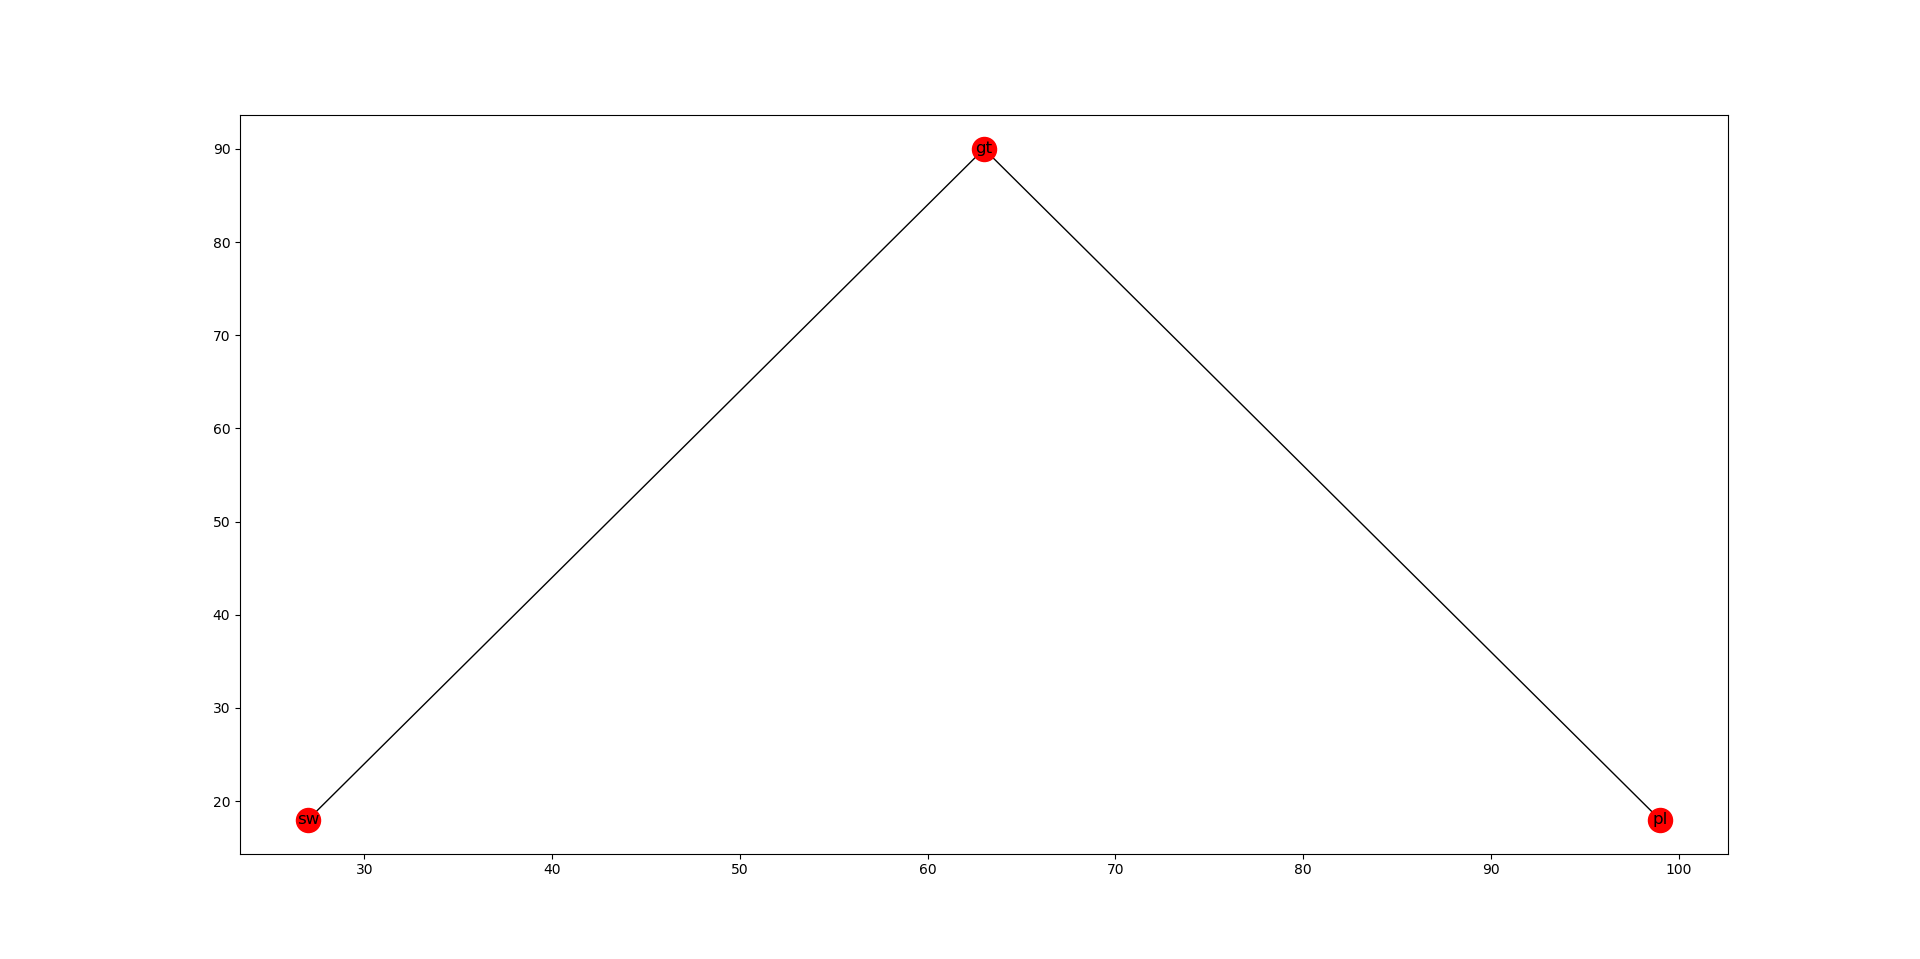
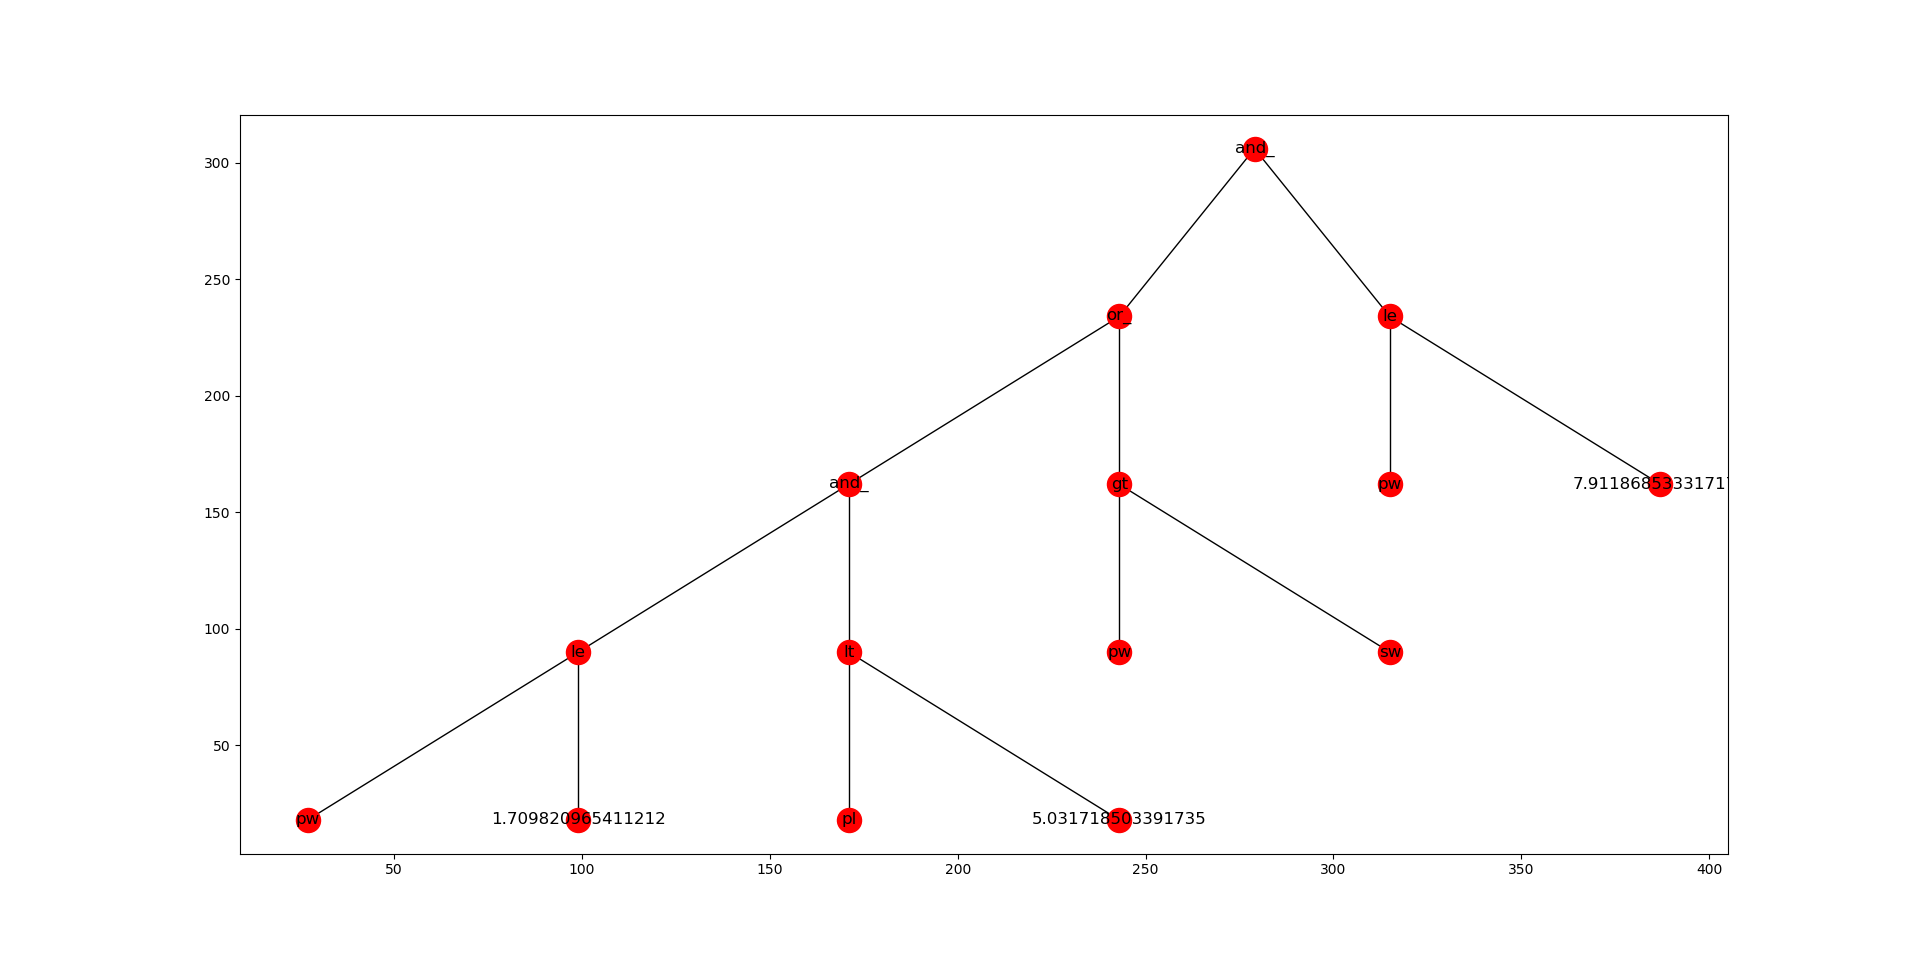